In [1]:
import pandas as pd
import numpy as np

import statsmodels.api as sm

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
ufos = pd.read_csv('../Data/Datasets/cleandate_weekly_reval.csv')

In [3]:
ufos.head()

,Unnamed: 0,startdateweek,weekly_ufocount,rel_val_alltime,year,month,weeknum,week_id
0,0,2014-07-06,470,100.000000,2014,7,27,2014-27
1,1,2015-11-08,406,86.382979,2015,11,45,2015-45
2,2,2020-04-19,403,85.744681,2020,4,16,2020-16
3,3,2013-07-07,399,84.893617,2013,7,27,2013-27
4,4,2012-07-08,339,72.127660,2012,7,27,2012-27


In [4]:
# sort the dataframe by date, resetting the index and dropping useles column
ufos = ufos.sort_values('startdateweek').reset_index(drop = True).drop('Unnamed: 0', axis = 1)

In [5]:
ufos.head()

,startdateweek,weekly_ufocount,rel_val_alltime,year,month,weeknum,week_id
0,2006-01-08,3,0.638298,2006,1,1,2006-1
1,2006-01-15,8,1.702128,2006,1,2,2006-2
2,2006-01-22,6,1.276596,2006,1,3,2006-3
3,2006-01-29,8,1.702128,2006,1,4,2006-4
4,2006-02-05,2,0.425532,2006,2,5,2006-5


#### Investigating the difference in ufo count during Corona crisis compared with predicted values based on the 13 years before 2020

#### Hypothesis: Significant increase in ufo sitings (ufo counts) as a representative value mental instability during times of crisis 

In [6]:
# dataframe for period before Corona, with a constant and t column as numeric representation for week_id
ufos_before = ufos.loc[ufos['startdateweek']< '2020-01-01']
ufos_before = sm.add_constant(ufos_before)
ufos_before = ufos_before.assign( t = (range(1 ,len(ufos_before)+1)))
ufos_before.head()

,const,startdateweek,weekly_ufocount,rel_val_alltime,year,month,weeknum,week_id,t
0,1.0,2006-01-08,3,0.638298,2006,1,1,2006-1,1
1,1.0,2006-01-15,8,1.702128,2006,1,2,2006-2,2
2,1.0,2006-01-22,6,1.276596,2006,1,3,2006-3,3
3,1.0,2006-01-29,8,1.702128,2006,1,4,2006-4,4
4,1.0,2006-02-05,2,0.425532,2006,2,5,2006-5,5


In [7]:
# declaring dependent variable Y as the ufocount per week and the independent variables t as repr. for week_id and constant
Y = ufos_before['weekly_ufocount']
X = ufos_before[['const', 't']]

In [8]:
# linear regression model 
reg_ufos_before = sm.OLS(Y, X)
result = reg_ufos_before.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        weekly_ufocount   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     18.29
Date:                Thu, 17 Sep 2020   Prob (F-statistic):           2.15e-05
Time:                        17:45:27   Log-Likelihood:                -3841.3
No. Observations:                 730   AIC:                             7687.
Df Residuals:                     728   BIC:                             7696.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         78.9254      3.463     22.792      0.000      72.127      85.724
t              0.0351      0.008      4.277      0.000       0.019       0.051
==============================================================================
Omnibus:                      424.751   Durbin-Watson:                   0.843
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5155.794
Skew:                           2.386   Prob(JB):                         0.00
Kurtosis:                      15.114   Cond. No.                         845.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### The model describes only about 2% of all values of weekly_ufocount. 

In [9]:
# predicting the values for weekly ufocount based on model
predicted_count = result.predict(X)


In [10]:
# assigning new column with predicted values 
ufos_before = ufos_before.assign( weekly_ufocount_pred = predicted_count)

In [11]:
ufos_before.head()

,const,startdateweek,weekly_ufocount,rel_val_alltime,year,month,weeknum,week_id,t,weekly_ufocount_pred
0,1.0,2006-01-08,3,0.638298,2006,1,1,2006-1,1,78.960489
1,1.0,2006-01-15,8,1.702128,2006,1,2,2006-2,2,78.995594
2,1.0,2006-01-22,6,1.276596,2006,1,3,2006-3,3,79.030699
3,1.0,2006-01-29,8,1.702128,2006,1,4,2006-4,4,79.065804
4,1.0,2006-02-05,2,0.425532,2006,2,5,2006-5,5,79.100908


In [12]:
# assigning a column with difference between weekly count and predicted weekly count
ufos_before = ufos_before.assign( ufocount_diff = ufos_before.weekly_ufocount - ufos_before.weekly_ufocount_pred )

In [13]:
ufos_before.startdateweek = pd.to_datetime(ufos_before.startdateweek)
ufos_before.index = pd.DatetimeIndex(ufos_before.startdateweek, freq = 'W')

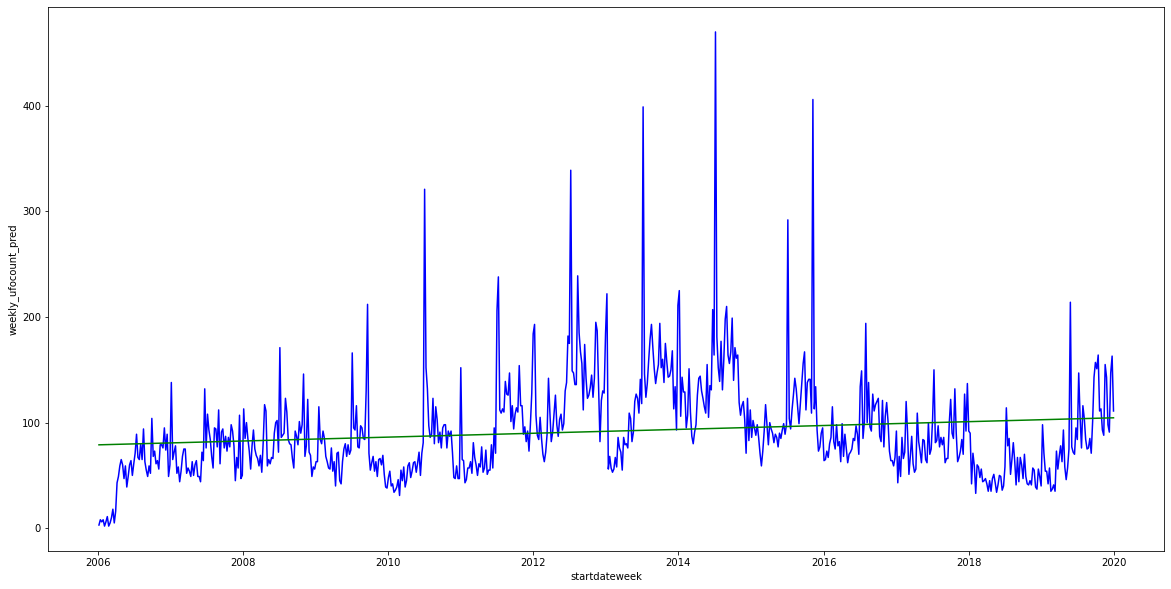

In [14]:
# plotting the weekly count and the predicted count as lineplot 'baseline'

fig, ax = plt.subplots ( figsize = (20,10))
#fig.autofmt_xdate()
ax1 = sns.lineplot( x = ufos_before['startdateweek'], y= ufos_before['weekly_ufocount'], color = 'blue')
ax2 = sns.lineplot( x = ufos_before['startdateweek'], y= ufos_before['weekly_ufocount_pred'], color = 'green')

With the model from the period before corona, trying to predict the values in 2020/ during Corona

In [15]:
# assigning a column with t as numeric repr. for week_id and a constant column
ufos = ufos.assign(const = 1, t= range(1, len(ufos)+1))

In [16]:
predicted_count_ufos = result.predict(ufos[['const', 't']])

In [20]:
# adding a column with predicted ufo count and the difference 
ufos = ufos.assign( weekly_ufocount_predicted = predicted_count_ufos)
                   
ufos = ufos.assign( difference = ufos.weekly_ufocount - ufos.weekly_ufocount_predicted)

In [21]:
ufos.startdateweek = pd.to_datetime(ufos.startdateweek) 
ufos.index = pd.DatetimeIndex(ufos.startdateweek, freq = 'W')

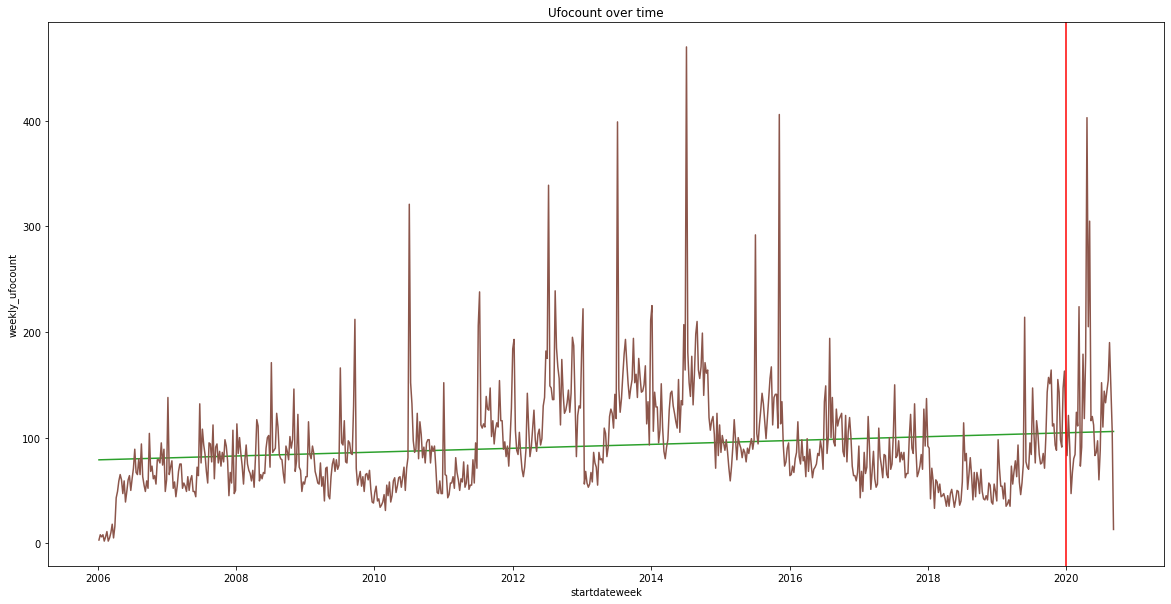

In [22]:
fig, ax = plt.subplots (figsize = (20, 10))

palette1 = sns.set_palette('GnBu', 4)
palette2 = sns.set_palette('GnBu', 8)

ax2 = sns.lineplot( x = ufos.startdateweek , y = ufos.weekly_ufocount_predicted, color = palette2)

ax1 = sns.lineplot( x = ufos.startdateweek , y = ufos.weekly_ufocount, color = palette1 )

#fig = (fig.set_axis_labels('Number of UFO sitings', 'Date'))

ax.set_title( 'Ufocount over time' )
#ax.set_axis_labels ('Number of UFO sitings', 'Date')
ax.axvline(pd.to_datetime('2020-01-01'), color = 'red' )

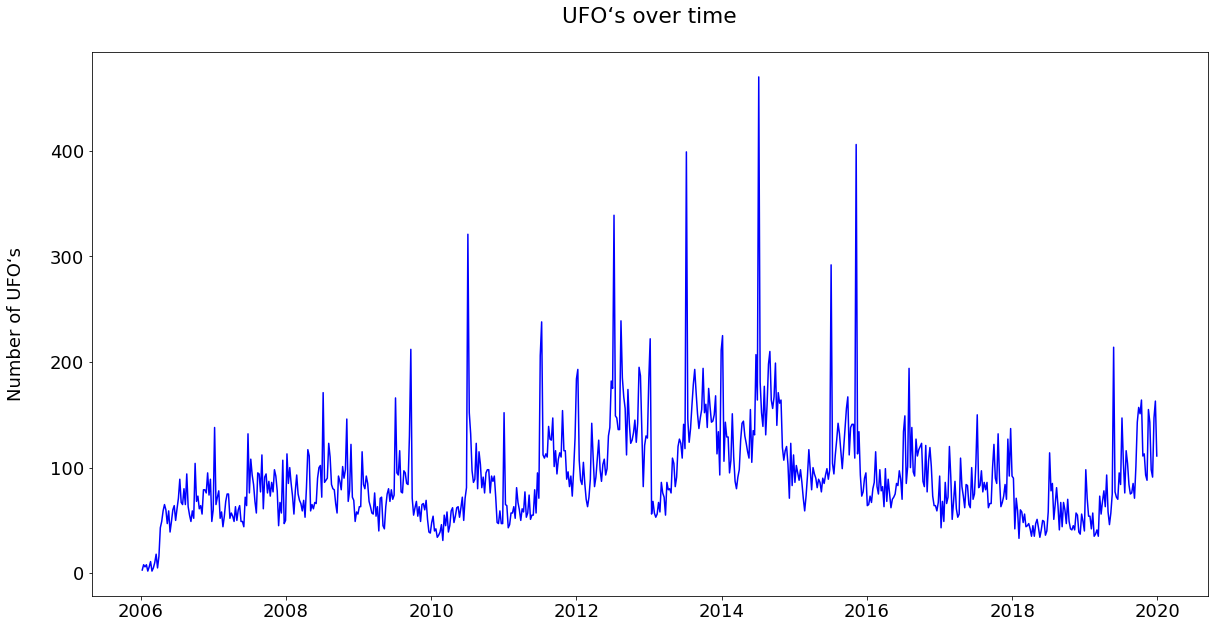

In [26]:
# plotting the weekly UFO count over time
fig, ax = plt.subplots ( figsize = (20,10))
#fig.autofmt_xdate()

plt.rcParams.update({'font.size': 18})

ax.set_title( 'UFO‘s over time\n' )

ax1 = sns.lineplot( x = ufos_before['startdateweek'], y= ufos_before['weekly_ufocount'], color = 'blue')
ax1.set_xlabel ('')
ax1.set_ylabel ('Number of UFO‘s\n')
plt.rcParams.update({'font.size': 18})
#plt.savefig("../BeautifulPlots/ufocount_time.png")